<a href="https://colab.research.google.com/github/user4c2crg325rcf/2021Council/blob/main/Plotting_Maori_Geographies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing and loading packages 
#not all packages are used 

install.packages('tidyverse')
library(tidyverse)
install.packages('ggthemes')
library(ggthemes)
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')
install.packages('sf')
library(sf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
#Reading in the geometrical data.

#The geographic files are taken from StatsNZ and hosted in a GitHub account for online access. 

#Maori Electorates 2020 
me_2020 <- read_delim('https://raw.githubusercontent.com/user4c2crg325rcf/2021Council/main/maori-electorates-2020.txt', delim = ',') %>%
          #converting to a shape file 
          st_as_sf(wkt = 'WKT', crs = 2193)

# Maori Wards 2021 Wards make up local councils 
mw_2021 <- read_delim('https://raw.githubusercontent.com/user4c2crg325rcf/2021Council/main/maori-ward-2021-generalised.csv', delim = ',') %>%
          #converting to a shape file 
          st_as_sf(wkt = 'WKT', crs = 2193)
        

# Maori Constituencies 2021 Constituencies make up regional ouncils
mc_2021 <- read_delim('https://raw.githubusercontent.com/user4c2crg325rcf/2021Council/main/maori-constituency-2021-generalised.csv', delim = ',') %>%
          #converting to a shape file 
          st_as_sf(wkt = 'WKT', crs = 2193) 

# These locations were taken from google maps and just used for demonstration purposes 
casino_locations <- read_delim('https://raw.githubusercontent.com/user4c2crg325rcf/2021Council/main/New-Zealand-Casino-Locations.csv', delim = ',') %>%
          st_as_sf(crs = 4326, coords = c('Latitude', 'Longitude')) 

glimpse(casino_locations)

# Adding Casino locations to... 

#Electorates 
#me_2020_c <- st_join(me_2020, casino_locations) 

#Wards 
#mw_2021_c <- st_join(mw_2021, casino_locations)

#Constituencies 
#mw_2021_c <- st_join(mw_2021, casino_locations)



── Column specification ────────────────────────────────────────────────────────
cols(
  WKT = col_character(),
  MED2020_V1_00 = col_double(),
  MED2020_V1_00_NAME = col_character(),
  MED2020_V1_00_NAME_ASCII = col_character(),
  Maori_Electoral_Population = col_double(),
  LAND_AREA_SQ_KM = col_double(),
  AREA_SQ_KM = col_double(),
  Shape_Length = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  WKT = col_character(),
  MWARD2021_V1_00 = col_character(),
  MWARD2021_V1_00_NAME = col_character(),
  MWARD2021_V1_00_NAME_ASCII = col_character(),
  LAND_AREA_SQ_KM = col_double(),
  AREA_SQ_KM = col_double(),
  Shape_STArea = col_double(),
  Shape_STLength = col_double(),
  Shape_Length = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  WKT = col_character(),
  MCON2021_V1_00 = col_character(),
  MCON2021_V1_00_NAME = col_character(),
  MCON2021_V1_00_NAME_ASCII = col_ch

Rows: 6
Columns: 4
$ Name     <chr> "SkyCity Auckland", "SkyCity Hamilton", "SkyCity Queenstown",…
$ City     <chr> "Auckland", "Hamilton", "Queenstown", "Queenstown", "Dunedin"…
$ Island   <chr> "North Island ", "North Island ", "South Island", "South Isla…
$ geometry <POINT [°]> POINT (174.7624 -36.84879), POINT (175.2843 -37.7865), …


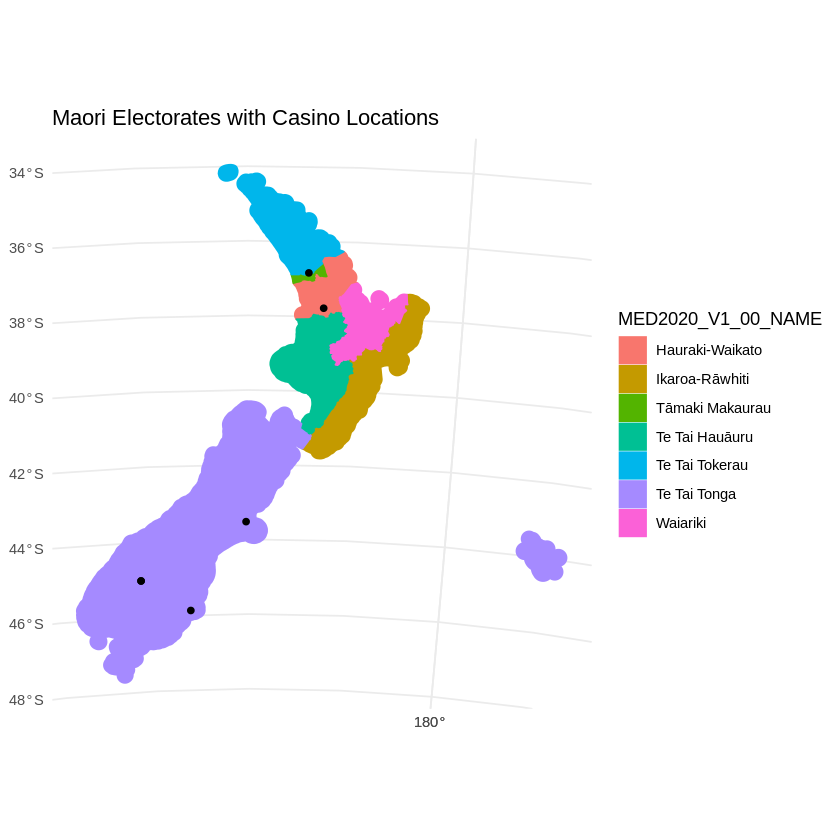

In [54]:
#Maori Electorates with casinos 

ggplot() +
# Plotting shapes 
geom_sf(data = me_2020, aes(col = MED2020_V1_00_NAME, fill = MED2020_V1_00_NAME)) +
# Plotting points
geom_sf(data = casino_locations) + 
# Setting Theme to minimal 
theme_minimal() +
# Setting title 
ggtitle('Maori Electorates with Casino Locations')



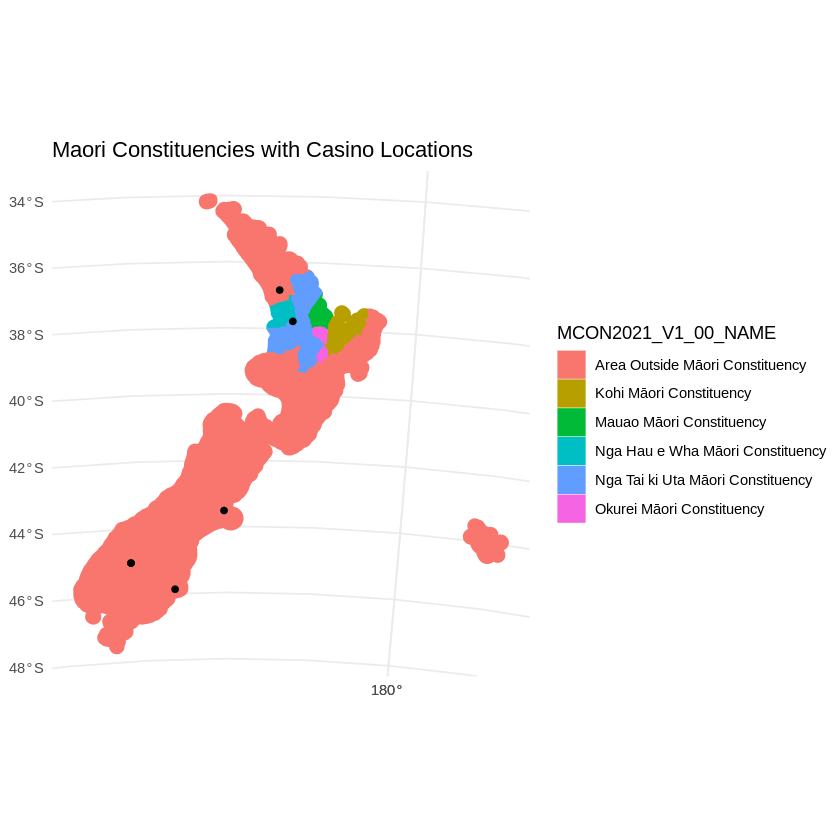

In [57]:
#Maori Constituencies with casinos 

ggplot() +
# Plotting shapes 
geom_sf(data = mc_2021, aes(col = MCON2021_V1_00_NAME, fill = MCON2021_V1_00_NAME)) +
# Plotting points
geom_sf(data = casino_locations) + 
# Setting Theme to minimal 
theme_minimal() +
# Setting title 
ggtitle('Maori Constituencies with Casino Locations')


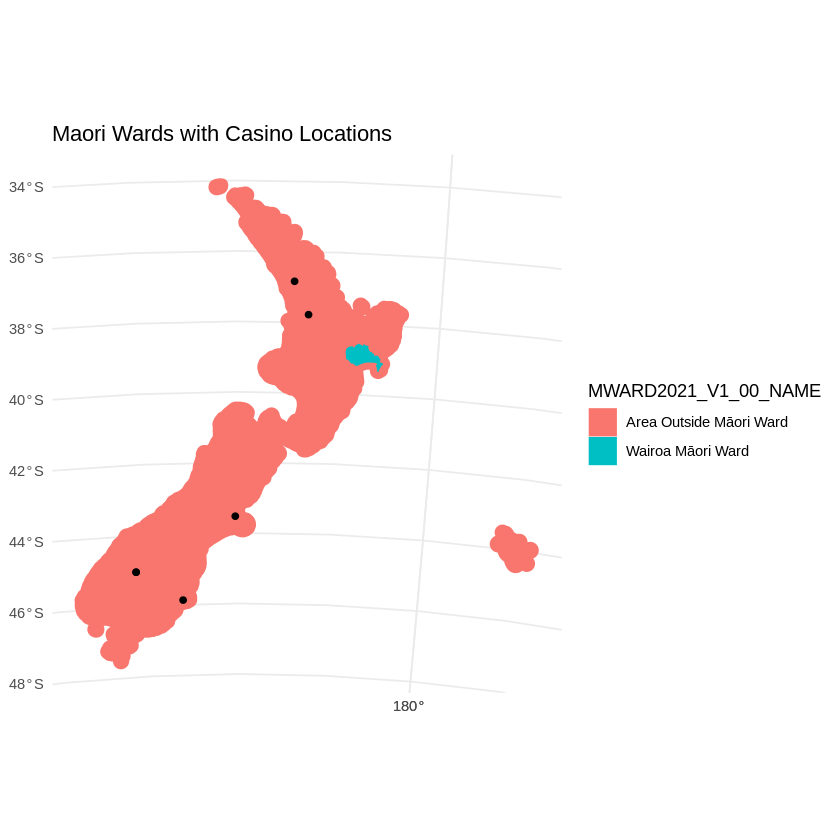

In [59]:
#Maori Wards with casinos 

ggplot() +
# Plotting shapes 
geom_sf(data = mw_2021, aes(col = MWARD2021_V1_00_NAME, fill = MWARD2021_V1_00_NAME)) +
# Plotting points
geom_sf(data = casino_locations) + 
# Setting Theme to minimal 
theme_minimal() +
# Setting title 
ggtitle('Maori Wards with Casino Locations')